# About Dataset

## Context
This dataset is created for prediction of Graduate Admissions from an Indian perspective.

## Content
The dataset contains several parameters which are considered important during the application for Masters Programs.

The parameters included are :

1. GRE Scores (out of 340)
2. TOEFL Scores (out of 120)
3. University Rating (out of 5)
4. Statement of Purpose (SOP) and Letter of Recommendation (LOR) Strength (out of 5)
5. Undergraduate GPA (CGPA) (out of 10)
6. Research Experience (either 0 or 1)
7. Chance of Admit (ranging from 0 to 1)

# Importing Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_columns", None)

# Loading the Dataset

In [2]:
df = pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


# Exploring the Dataset

In [3]:
# check rows and columns of the dataset
df.shape

(500, 9)

In [4]:
# Check for all column headers
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
# Check the basic info of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
# Check the basic Statistics on numeric columns
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
# Check if any null values
df.isnull().any()

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [8]:
# Renaming the columns with appropriate names

df = df.rename(columns= {'LOR ': 'LOR', 'Chance of Admit ': 'Chance of Admit'})

df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


The Columns LOR and Chance of Admit had a blank space which we removed in above steps.

# Data Visualization

Text(0, 0.5, 'Count')

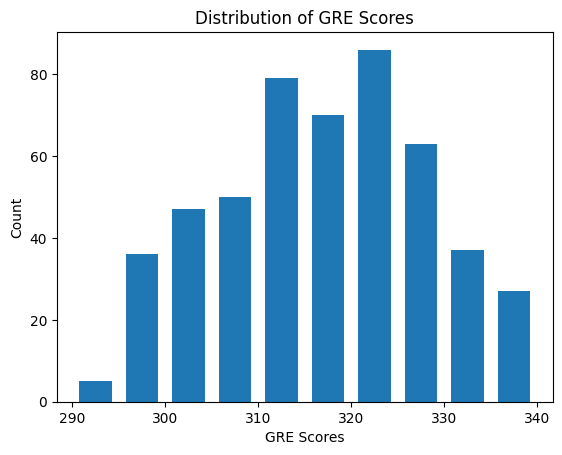

In [9]:
# Visualizing the GRE score

fig = plt.hist(df['GRE Score'], rwidth= 0.7)
plt.title("Distribution of GRE Scores")
plt.xlabel('GRE Scores')
plt.ylabel('Count')

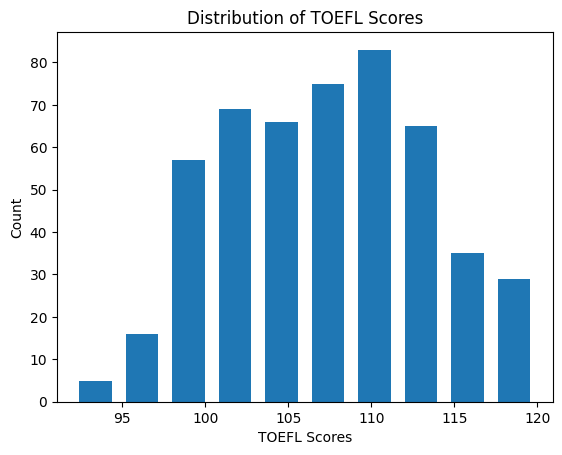

In [10]:

# Visualizing the feature TOEFL
fig = plt.hist(df['TOEFL Score'], rwidth=0.7)
plt.title('Distribution of TOEFL Scores')
plt.xlabel('TOEFL Scores')
plt.ylabel('Count')
plt.show()

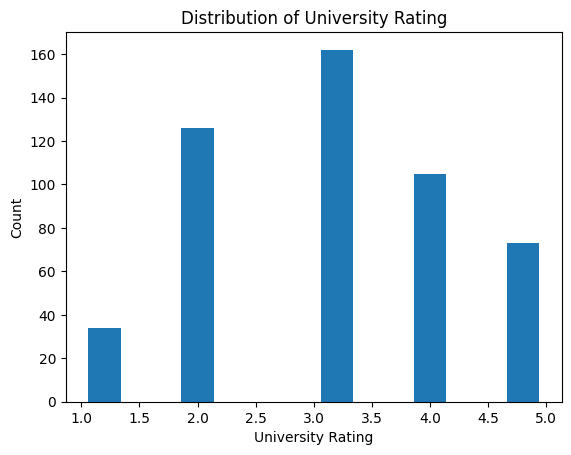

In [11]:
# Visualizing the feature University Rating
fig = plt.hist(df['University Rating'], rwidth=0.7)
plt.title('Distribution of University Rating')
plt.xlabel('University Rating')
plt.ylabel('Count')
plt.show()

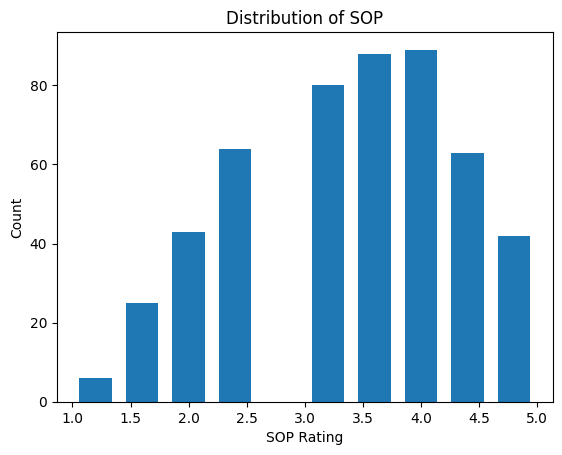

In [12]:
# Visualizing the feature SOP (Statement of Purpose) (out of 5)
fig = plt.hist(df['SOP'], rwidth=0.7)
plt.title('Distribution of SOP')
plt.xlabel('SOP Rating')
plt.ylabel('Count')
plt.show()

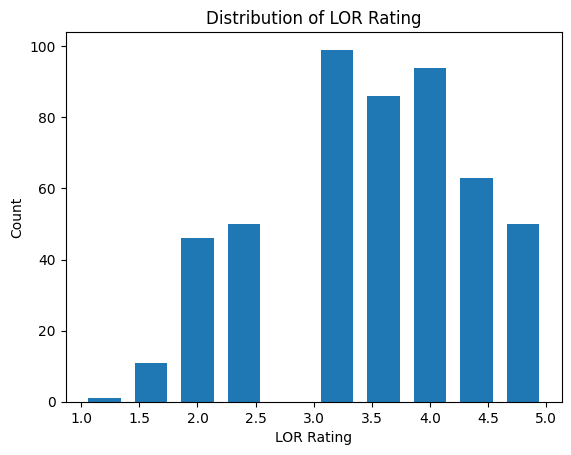

In [13]:
# Visualizing the feature LOR (Letter of Recommendation Strength) (out of 5)
fig = plt.hist(df['LOR'], rwidth=0.7)
plt.title('Distribution of LOR Rating')
plt.xlabel('LOR Rating')
plt.ylabel('Count')
plt.show()

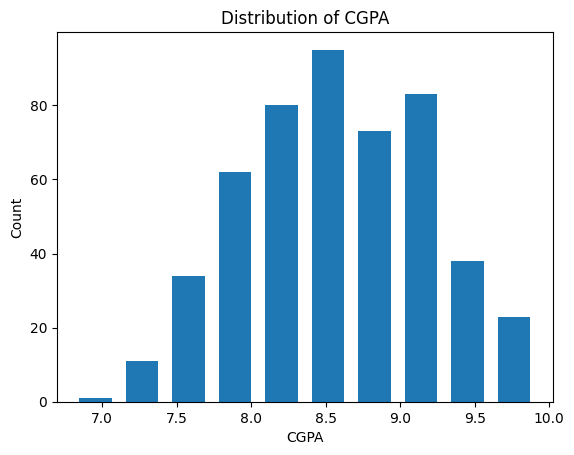

In [14]:
# Visualizing the feature CGPA
fig = plt.hist(df['CGPA'], rwidth=0.7)
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Count')
plt.show()

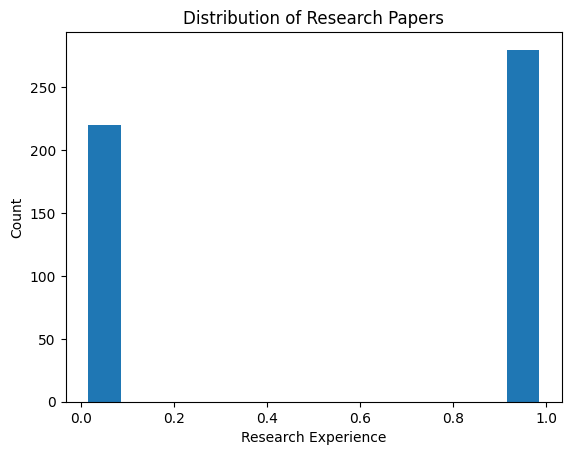

In [15]:
# Visualizing the feature Research Expereince
fig = plt.hist(df['Research'], rwidth=0.7)
plt.title('Distribution of Research Papers')
plt.xlabel('Research Experience')
plt.ylabel('Count')
plt.show()

# Data Cleaning

In [16]:
# Dropping the Serial Number column
df.drop('Serial No.', axis=1, inplace= True)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [17]:
# Replacing the null values
# df[['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research','Chance of Admit']] = df[['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research','Chance of Admit']].replace(0, np.NaN)
# df.isnull().sum()

There were no null values

# Model Building

In [18]:
# Splitting the dataset in Features and Label

x = df.drop('Chance of Admit', axis= 'columns')
y = df['Chance of Admit']

In [19]:
# Using GridSearchCV to find the best alogorithm for this problem

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, Lasso

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [20]:
# Creating a function to calculate best model for this problem

def find_best_model(x, y):
    model = {'linear_regression': {
        'model': LinearRegression(),
        'parameters': {
            'fit_intercept': [True, False]
        }
    },
             'lasso': {
                'model': Lasso(),
                'parameters': {
                    'alpha': [1, 2],
                    'selection': ['random', 'cyclic']
                }
            },
            'svr': {
                'model': SVR(),
                'parameters': {
                    'gamma': [0.001, 0.01, 0.1, 1.0],
                    'kernel': ['rbf', 'linear']
                }
            },
            'decision_tree': {
                'model': DecisionTreeRegressor(),
                'parameters': {
                    'criterion': ['squared_error'],
                    'splitter': ['best', 'random']
                }
            },
            'random_forest': {
                'model': RandomForestRegressor(criterion= 'squared_error', random_state= 42),
                'parameters': {
                    'n_estimators': [5, 10, 15, 20]
                }
            },
            'knn': {
                'model': KNeighborsRegressor(algorithm= 'auto'),
                'parameters': {
                    'n_neighbors': [2, 5, 10, 20]
                }
            }
        }

    scores = []

    for model_name, model_params in model.items():
        gs = GridSearchCV(model_params['model'],
                          model_params['parameters'],
                          cv= 5, return_train_score= False,
                          n_jobs=-1) # n_jobs=-1 to use all available cores
        gs.fit(x, y)
        scores.append({'model': model_name,
                      'best_parameters': gs.best_params_,
                      'score': gs.best_score_})

    return pd.DataFrame(scores, columns= ['model', 'best_parameters', 'score'])

find_best_model(x, y)

,model,best_parameters,score
0,linear_regression,{'fit_intercept': True},0.810802
1,lasso,"{'alpha': 1, 'selection': 'random'}",0.215088
2,svr,"{'gamma': 0.001, 'kernel': 'linear'}",0.782325
3,decision_tree,"{'criterion': 'squared_error', 'splitter': 'ra...",0.608040
4,random_forest,{'n_estimators': 20},0.769003
5,knn,{'n_neighbors': 20},0.723012


**Since the Linear Regression algorithm has the highest accuracy, the model selected for this problem is Linear Regression.**

# Linear Regression Model

In [21]:
# Using cross_val_score for gaining high accuracy

from sklearn.model_selection import cross_val_score

scores = cross_val_score(LinearRegression(fit_intercept= True), x, y, cv= 5, n_jobs= -1)

print('Highest Accuracy: {}%'.format(round(sum(scores) * 100 / len(scores)), 3))

Highest Accuracy: 81%


In [22]:
# Splitting the dataset into train and test samples

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

print(len(x_train), len(x_test))

400 100


In [23]:
# Creating Linear Regression Model
model = LinearRegression(fit_intercept= True, n_jobs= -1)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.818843256782963

# Predicting the Values using our trained model

In [24]:
# Prediction 1
# Input in the form : GRE, TOEFL, University Rating, SOP, LOR, CGPA, Research
print('Chance of getting into UCLA is {}%'.format(round(model.predict([[337, 118, 4, 4.5, 4.5, 9.65, 0]])[0]*100, 3)))

Chance of getting into UCLA is 93.437%


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [25]:
# Prediction 2
# Input in the form : GRE, TOEFL, University Rating, SOP, LOR, CGPA, Research
print('Chance of getting into UCLA is {}%'.format(round(model.predict([[320, 113, 2, 2.0, 2.5, 8.64, 1]])[0]*100, 3)))

Chance of getting into UCLA is 74.423%


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
